In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import cartopy.crs as ccrs
import geopandas as gpd

In [7]:
pip install contextily

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.7 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.9/18.9 MB 5.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 3.3 MB/s eta 0:00:00
Using cached affine-2.4.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
sntls = pd.read_csv('./sntl_list.csv')

/var/folders/db/7c91t8d577n1zsyhth1xc7840000gn/T/ipykernel_11600/1738430922.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')


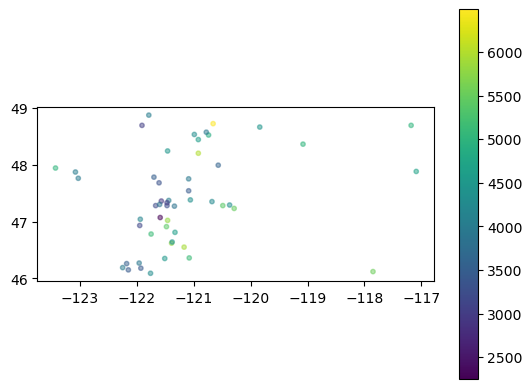

In [6]:
# Create a GeoDataFrame from your data
gdf = gpd.GeoDataFrame(sntls, geometry=gpd.points_from_xy(sntls.lon, sntls.lat))
gdf['elev'] = pd.to_numeric(gdf['elev'], errors='coerce')
gdf = gdf.dropna(subset=['elev'])

# Normalize the 'elev' column for color mapping
norm = plt.Normalize(vmin=sntls['elev'].min(), vmax=sntls['elev'].max())
colormap = plt.cm.get_cmap('viridis')

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the points with color representing elevation
gdf.plot(ax=ax, markersize=10, alpha=0.5, column='elev', cmap=colormap, legend=True)

# Show the plot
plt.show()

/var/folders/db/7c91t8d577n1zsyhth1xc7840000gn/T/ipykernel_11600/4251578315.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('terrain')


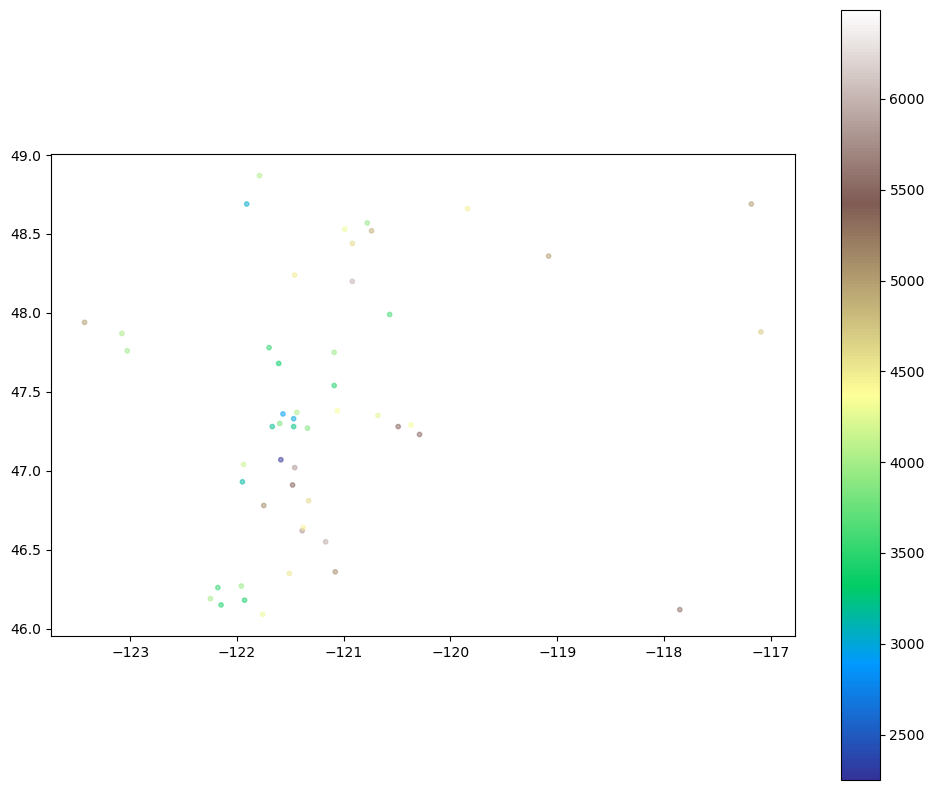

In [12]:
import contextily as ctx

# Create a GeoDataFrame from your data
gdf = gpd.GeoDataFrame(sntls, geometry=gpd.points_from_xy(sntls.lon, sntls.lat))
gdf['elev'] = pd.to_numeric(gdf['elev'], errors='coerce')
gdf = gdf.dropna(subset=['elev'])

# Set the CRS to WGS84
gdf.crs = "EPSG:4326"

# Normalize the 'elev' column for color mapping
norm = plt.Normalize(vmin=sntls['elev'].min(), vmax=sntls['elev'].max())
colormap = plt.cm.get_cmap('terrain')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the points with color representing elevation
gdf.plot(ax=ax, markersize=10, alpha=0.5, column='elev', cmap=colormap, legend=True)

# Add the basemap
# ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.Esri.WorldImagery)

# Show the plot
plt.show()

In [31]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a GeoDataFrame from your data
gdf = gpd.GeoDataFrame(sntls, geometry=gpd.points_from_xy(sntls.lon, sntls.lat))
gdf['elev'] = pd.to_numeric(gdf['elev'], errors='coerce')
gdf = gdf.dropna(subset=['elev'])

# Normalize the 'elev' column for color mapping
norm = plt.Normalize(vmin=sntls['elev'].min(), vmax=sntls['elev'].max())
colormap = plt.cm.get_cmap('viridis')

# Create a figure and axes with Cartopy's PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add state outlines
states = cfeature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_shp')
ax.add_feature(states, edgecolor='black')

# Add rivers
rivers = cfeature.NaturalEarthFeature(category='physical', scale='50m',
                                      facecolor='none', name='rivers_lake_centerlines')
ax.add_feature(rivers, edgecolor='blue')

# Plot the points with color representing elevation
gdf.plot(ax=ax, markersize=10, alpha=0.5, column='elev', cmap=colormap, legend=True, transform=ccrs.PlateCarree())

# Show the plot
plt.show()

/var/folders/db/7c91t8d577n1zsyhth1xc7840000gn/T/ipykernel_11600/3689253403.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis')
/Users/clintonalden/miniconda3/envs/env1/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_shp.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


HTTPError: HTTP Error 404: Not Found

/Users/clintonalden/miniconda3/envs/env1/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_shp.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


HTTPError: HTTP Error 404: Not Found

<Figure size 1000x1000 with 2 Axes>